# Creating scatter plots with pandas, matplotlib, and seaborn

It's hard for me to figure out the syntax, so I need a guide to find different options.

In [1]:
# TEST

# TEST2

# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ggplot import *    # requires a pip install
%matplotlib inline

## 1. Sample dataframe

In [107]:
np.arange(0, 100, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [814]:
# Sample dataframe with distribution

df = pd.DataFrame()   # initialize an empty dataframe
df['feature_x'] = np.arange(-10, 10)             # to be plotted in x-dimension
df['feature_y'] = np.arange(-20, 20, 2)
df['feature_y'] = np.random.normal(size=20) # to be plotted in y-dimension
df['feature_sz'] = df['feature_y'].copy()             # to represent size, when applicable
#df['feature_szDec'] = np.arange(-.200, .040, 0.002)                                                # tracks with 'feature_y' column
df['feature_c'] = df['feature_x'].copy()    # continuous variable; to represent color, when applicable
                                                # tracks with 'feature_x' column
    
# categorical variable; to represent color in a classification context, tracks with x
groupSize = round(len(df)/5)
df['feature_cat'] = ['group 1']*groupSize + ['group 2']*groupSize + ['group 3']*groupSize + ['group 4']*groupSize + ['group 5']*(len(df)-groupSize*4)

In [718]:
# Sample dataframe with skewed distribution


df = pd.DataFrame()   # initialize an empty dataframe
df['feature_x'] = np.arange(-10, 10)             # to be plotted in x-dimension
df['feature_y'] = np.arange(0, 20)
#df['feature_y'] = np.random.normal(size=50) # to be plotted in y-dimension
df['feature_sz'] = df['feature_y'].copy()             # to represent size, when applicable
#df['feature_szDec'] = np.arange(-.200, .040, 0.002)                                                # tracks with 'feature_y' column
df['feature_c'] = df['feature_x'].copy()    # continuous variable; to represent color, when applicable
                                                # tracks with 'feature_x' column
    
# categorical variable; to represent color in a classification context, tracks with x
groupSize = round(len(df)/5)
df['feature_cat'] = ['group 1']*groupSize + ['group 2']*groupSize + ['group 3']*groupSize + ['group 4']*groupSize + ['group 5']*(len(df)-groupSize*4)

In [684]:
df

,feature_x,feature_y,feature_sz,feature_c,feature_cat,sizes
0,-10,-0.487706,-0.487706,-10,group 1,70.583747
1,-9,0.158592,0.158592,-9,group 1,102.784844
2,-8,0.630960,0.630960,-8,group 1,126.320051
3,-7,0.585950,0.585950,-7,group 1,124.077467
4,-6,0.949756,0.949756,-6,group 2,142.203722
5,-5,1.124417,1.124417,-5,group 2,150.906019
6,-4,-0.440855,-0.440855,-4,group 2,72.918009
7,-3,0.865322,0.865322,-3,group 2,137.996874
8,-2,-1.884298,-1.884298,-2,group 3,1.000000
9,-1,-0.048416,-0.048416,-1,group 3,92.470889


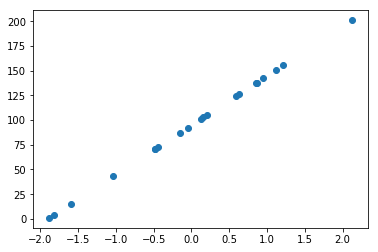

In [687]:
plt.scatter(df['feature_sz'], df['sizes'])


## 2. Scatter plot with markers sized by continuous variable from one feature, with an accurate legend

Requirements of this scatter plot:

Version 0.01
1. Marker size should be an accurate representation of the desired feature.
2. A legend allowing for marker size interpretation must be shown. The legend allows for a user-defined number of points and the title of the feature shown. The points shown in the legend are distributed through the range of the desired feature, but will use actual data points of the feature.
3. Marker sizes should be able to accomodate positive and negative numbers.
4. Marker sizes should be able to accomodate a large range and skewed distributions.

Version 0.02
3. Colors on a spectrum, representing continous values, are an addition to the depiction of marker size (not only a substitute of) the desired feature. An additional legend for the color is also shown.

Version 0.03
4. Distinct colors, representing categorical variables, are an addition to the depiction of marker size (not only a substitute of) the desired feature. An additional legend for the color is also shown.

#### Test cases:

- log order distribution of values
- negative values
- skewed distributions (points clustered very high, very low)

### 2.0 Default matplotlib 

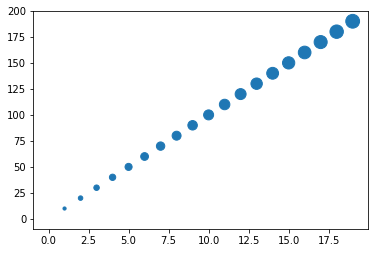

In [254]:
f, ax = plt.subplots(1,1);
ax.scatter(df['feature_x'], df['feature_y'], s=df['feature_sz'])

# can't plot that directly

### 2.1 Grouping sized feature into bins (idea from Stackoverfow)
https://stackoverflow.com/questions/24164797/creating-a-matplotlib-scatter-legend-size-related


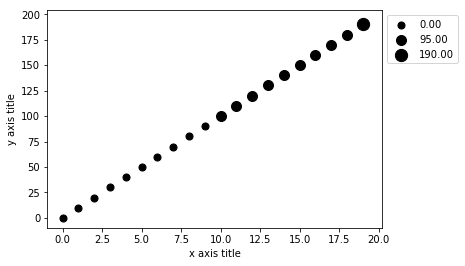

In [255]:
# Creating bins for scatterplot size markers

f, ax = plt.subplots(1,1);
noBins = 3
bins = np.linspace(df['feature_sz'].min(), df['feature_sz'].max(), noBins)
grouped = df.groupby(np.digitize(df['feature_sz'], bins))

# Create some sizes and some labels.
sizes = [50*(i+1.) for i in range(noBins)]
# change labels to the bin increment separators
# labels = np.array2string(bins) #, formatter={'float_kind':lambda x: "%.2f" % x})
labels = ["%.2f" % x for x in bins]
# labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']

for i, (name, group) in enumerate(grouped):
    plt.scatter(group['feature_x'], group['feature_y'], s=sizes[i], color='k', label=labels[i])
ax.legend(loc='upper left',  bbox_to_anchor=(1,1));
ax.set_xlabel('x axis title')
ax.set_ylabel('y axis title')

### Summary of 2.1

Pro:
- Easy, straightforward to implement.
- Allows you to choose the number of size markers. (Meets 0.01.02)

Con:
- The upper-most marker is only represented once. (Fails 0.01.01)
- The points on the plot are not truly representative. It shows markers that are the same size when the values they are supposed to represent are continuously varying.

### 2.2 Plotting the sized feature, then underlaying representative samples for the purpose of the legend (my idea)


/Users/lacar/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


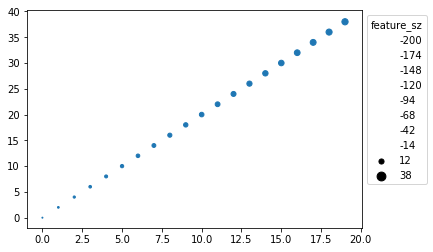

In [268]:
# Show markers accurately representing the continuously varying values of the feature, but
# only show a few size representations on the legend?

f, ax = plt.subplots(1,1);

# --- all for the legend - just pick number of points ---
noLegendPoints = 5
# these are the legend points, distributed through the size range
legendPoints_ideal = np.linspace(df['feature_sz'].min(), df['feature_sz'].max(), noLegendPoints)
# these are the dataframe rows that are closest to those legendPoints
# dense  list comprehension to get the closest values in the dataset that are distributed
legendPoints_data = [(df['feature_sz'].iloc[(df['feature_sz']-x).abs().argsort()[0]]) for x in legendPoints_ideal]
# find the rows and make a new dataframe; underlay the plot and add that
dfTemp = df[df['feature_sz'].isin(legendPoints_data)]
for i, data in dfTemp.iterrows():
    ax.scatter(data['feature_x'], data['feature_sz'], s=2*(data['feature_sz']+1), c='w', label=str(data['feature_sz']))

# --- actual data; make label=None so that it doesn't over-ride the custom plot for the legend ---
ax.scatter(df['feature_x'], df['feature_y'], s=df['feature_sz']+1, label=None) #, color='k', 

# --- place the legend which should only show for the underlaying plot ---
ax.legend(title='feature_sz', loc='upper left', bbox_to_anchor=(1,1))
# manually set the colors of the marker legends to black
leg = ax.get_legend()
for i in range(len(leg.legendHandles)):
    leg.legendHandles[i].set_color('black')

In [ ]:
df['feature_sz'].max(np.abs['feature_sz'])

In [292]:
1+szMaxMarker*((df['feature_sz']-df['feature_sz'].min())/(df['feature_sz'].max()-df['feature_sz'].min()))

0        1.000000
1        2.680672
2        4.361345
3        6.042017
4        7.722689
5        9.403361
6       11.084034
7       12.764706
8       14.445378
9       16.126050
10      17.806723
11      19.487395
12      21.168067
13      22.848739
14      24.529412
15      26.210084
16      27.890756
17      29.571429
18      31.252101
19      32.932773
20      34.613445
21      36.294118
22      37.974790
23      39.655462
24      41.336134
25      43.016807
26      44.697479
27      46.378151
28      48.058824
29      49.739496
          ...    
90     152.260504
91     153.941176
92     155.621849
93     157.302521
94     158.983193
95     160.663866
96     162.344538
97     164.025210
98     165.705882
99     167.386555
100    169.067227
101    170.747899
102    172.428571
103    174.109244
104    175.789916
105    177.470588
106    179.151261
107    180.831933
108    182.512605
109    184.193277
110    185.873950
111    187.554622
112    189.235294
113    190.915966
114    192

In [ ]:
# In order for negative numbers to be plotted, a parallel marker size map
# has to reflect the desired feature column
# make the marker map scale 1-200; seems practical (but this can be an option)

#### Make a sized plot, colored by categorical variables

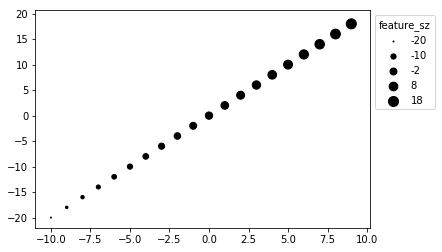

In [335]:
# Show markers accurately representing the continuously varying values of the feature, but
# only show a few size representations on the legend?

f, ax = plt.subplots(1,1);

# -- make a sizes vector and add it to the dataframe ---
szMaxMarker = 100
df['sizes'] = 1+szMaxMarker*((df['feature_sz']-df['feature_sz'].min())/(df['feature_sz'].max()-df['feature_sz'].min()))

# --- all for the legend - just pick number of points ---
noLegendPoints = 5
# these are the legend points, distributed through the size range
legendPoints_ideal = np.linspace(df['feature_sz'].min(), df['feature_sz'].max(), noLegendPoints)
# these are the dataframe rows that are closest to those legendPoints
# dense  list comprehension to get the closest values in the dataset that are distributed
legendPoints_data = [(df['feature_sz'].iloc[(df['feature_sz']-x).abs().argsort()[0]]) for x in legendPoints_ideal]
# find the rows and make a new dataframe; underlay the plot and add that
dfTemp = df[df['feature_sz'].isin(legendPoints_data)]
for i, data in dfTemp.iterrows():
    ax.scatter(data['feature_x'], data['feature_sz'], s=(data['sizes']), c='w', label=str(data['feature_sz']))

# --- actual data; make label=None so that it doesn't over-ride the custom plot for the legend ---
ax.scatter(df['feature_x'], df['feature_y'], s=df['sizes'], color='k', label=None) #, color='k', 

# --- place the legend which should only show for the underlaying plot ---
ax.legend(title='feature_sz', loc='upper left', bbox_to_anchor=(1,1))
# manually set the colors of the marker legends to black
leg = ax.get_legend()
for i in range(len(leg.legendHandles)):
    leg.legendHandles[i].set_color('black')

#### Make a sized plot, colored by categorical variables

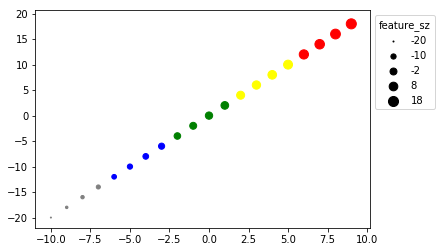

In [341]:
# Show markers accurately representing the continuously varying values of the feature, but
# only show a few size representations on the legend?

f, ax = plt.subplots(1,1);

# -- make a sizes vector and add it to the dataframe ---
szMaxMarker = 100
df['sizes'] = 1+szMaxMarker*((df['feature_sz']-df['feature_sz'].min())/(df['feature_sz'].max()-df['feature_sz'].min()))

# --- all for the legend - just pick number of points ---
noLegendPoints = 5
# these are the legend points, distributed through the size range
legendPoints_ideal = np.linspace(df['feature_sz'].min(), df['feature_sz'].max(), noLegendPoints)
# these are the dataframe rows that are closest to those legendPoints
# dense  list comprehension to get the closest values in the dataset that are distributed
legendPoints_data = [(df['feature_sz'].iloc[(df['feature_sz']-x).abs().argsort()[0]]) for x in legendPoints_ideal]
# find the rows and make a new dataframe; underlay the plot and add that
dfTemp = df[df['feature_sz'].isin(legendPoints_data)]
for i, data in dfTemp.iterrows():
    ax.scatter(data['feature_x'], data['feature_sz'], s=(data['sizes']), c='w', label=str(data['feature_sz']))

    
# sizing and categorical variables
colors=['gray', 'blue', 'green', 'yellow', 'red']

# --- actual data; make label=None so that it doesn't over-ride the custom plot for the legend ---
# ax.scatter(df['feature_x'], df['feature_y'], s=df['sizes'], color='k', label=None) #, color='k', 

for ind,data in enumerate(df['feature_cat'].unique()):
    dfTemp = df[df['feature_cat']==data]
    ax.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], s=dfTemp['sizes'], color=colors[ind], label=None) #label=dfTemp['feature_cat'])

# --- place the legend which should only show for the underlaying plot ---
ax.legend(title='feature_sz', loc='upper left', bbox_to_anchor=(1,1))
# manually set the colors of the marker legends to black
leg = ax.get_legend()
for i in range(len(leg.legendHandles)):
    leg.legendHandles[i].set_color('black')
    


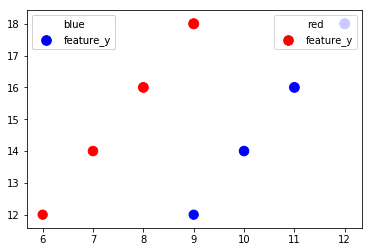

In [388]:
f, ax = plt.subplots(1,1);

colorPlot = ax.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], s=dfTemp['sizes'], c='red') #label=dfTemp['feature_cat'])
colorPlot2 = ax.scatter(x=dfTemp['feature_x']+3, y=dfTemp['feature_y'], s=dfTemp['sizes'], c='blue') #, label='blue') #label=dfTemp['feature_cat'])


# Create a legend for the first plot
first_legend = plt.legend(handles=[colorPlot], loc=1, title='red')
# Create a legend for the second plot
second_legend = plt.legend(handles=[colorPlot2], loc=2, title='blue')

# Add legends manually to the current Axes.
ax = plt.gca().add_artist(first_legend)
ax = plt.gca().add_artist(second_legend)



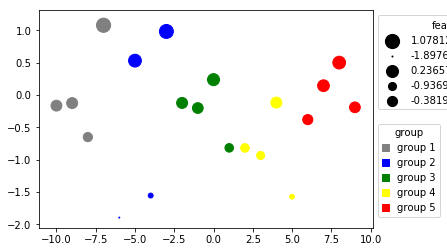

In [766]:
# Show markers accurately representing the continuously varying values of the feature, but
# only show a few size representations on the legend

f, ax = plt.subplots(1,1);

# -- make a sizes vector and add it to the dataframe ---
szMaxMarker = 200
df['sizes'] = 1+szMaxMarker*((df['feature_sz']-df['feature_sz'].min())/(df['feature_sz'].max()-df['feature_sz'].min()))

# --- all for the legend - just pick number of points ---
noLegendPoints = 5
# these are the legend points, distributed through the size range
legendPoints_ideal = np.linspace(df['feature_sz'].min(), df['feature_sz'].max(), noLegendPoints)
# these are the dataframe rows that are closest to those legendPoints
# dense  list comprehension to get the closest values in the dataset that are distributed
legendPoints_data = [(df['feature_sz'].iloc[(df['feature_sz']-x).abs().argsort()[0]]) for x in legendPoints_ideal]
# find the rows and make a new dataframe; underlay the plot and add that
dfTemp = df[df['feature_sz'].isin(legendPoints_data)]
for i, data in dfTemp.iterrows():
    # Set the color to white so it's the same as the background. It is plotted before all the data intended to be visible
    # so it will be underrneath that layer.
    ax.scatter(data['feature_x'], data['feature_sz'], s=(data['sizes']), c='w', label=str(data['feature_sz']))

# --- place the legend which should only show for the underlaying plot ---
first_legend = ax.legend(title='feature_sz', loc='upper left', bbox_to_anchor=(1,1))
# manually set the colors of the marker legends to black
for i in range(len(first_legend.legendHandles)):
     first_legend.legendHandles[i].set_color('black')

# Add first legend manually to the current Axes.
plt.gca().add_artist(first_legend)        
    
# --- actual data; make label=None so that it doesn't over-ride the custom plot for the legend ---
    
# colors for categorical variables  
colors=['gray', 'blue', 'green', 'yellow', 'red']

# ax.scatter(df['feature_x'], df['feature_y'], s=df['sizes'], color='k', label=None) #, color='k', 

for ind,data in enumerate(df['feature_cat'].unique()):
    dfTemp = df[df['feature_cat']==data]
    ax.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], s=dfTemp['sizes'], color=colors[ind], label=None)

# re-plotting for the purposes of the class legend

# dfTemp2 = pd.DataFrame()
# for ind,data in enumerate(df['feature_cat'].unique()):
#     # make a new dataframe that appends each row
#     dfTemp2 = dfTemp2.append(df[df['feature_cat']==data].iloc[0,:], ignore_index=True)   # getting the first example from each class

# for i, data in dfTemp2.iterrows():
#     ax.scatter(data['feature_x'], data['feature_sz'], c='w', label=str(data['feature_cat']))
     
# second_legend = plt.legend(title='groups', loc='upper left', bbox_to_anchor=(1,0.5))
# for i in range(len(second_legend.legendHandles)):
#      second_legend.legendHandles[i].set_color('black')
        

# Create a legend for the second plot
    # Create artist specifically for adding to the legend
    # https://matplotlib.org/users/legend_guide.html
#second_legend = plt.legend(handles=[colorPlot2], loc=2, title='blue')


# Add second legend specific to the colors of the groups
# import matplotlib.patches as mpatches
# group_patches = []
# for i in enumerate(colors):
#     group_patches[i] = mpatches.Patch(color=colors[i], label=df['feature_cat'].unique()[i])
# colors=['red']

# using mpatches for automating a second legend

# test = [mpatches.Patch(color='red', label='red data'), mpatches.Patch(color='blue', label='blue data')]
# definining hatch is a hard exercise
# hard to do a group
# red_patch = mpatches.Patch(color='red', label='red data')
# blue_patch = mpatches.Patch(color='blue', label='blue data')
# group_patches = [red_patch, blue_patch]
# plt.legend(handles=group_patches, loc='upper left', bbox_to_anchor=(1,0.5))

import matplotlib.patches as mpatches
groups = df['feature_cat'].unique().tolist()
group_patches = list()
for i,data in enumerate(groups):
    #print(i, data, groups[i])
    group_patches.append(mpatches.Patch(color=colors[i], label=data))

# changed the handlelength parameter to 0.7 to get square-shaped colored boxes in the legend    
ax.legend(handles=group_patches, title='group', loc='upper left', bbox_to_anchor=(1,0.5), handlelength=0.7)


## Turning this into a definition call

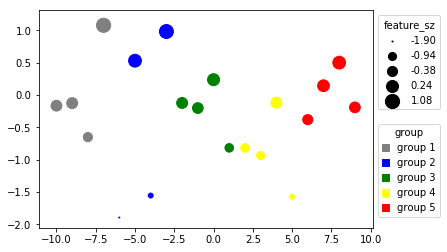

In [767]:
# Show markers accurately representing the continuously varying values of the feature, but
# only show a few size representations on the legend

f, ax = plt.subplots(1,1);

# define ahead of time:
# colors, 

# def gScatter(df, x, y, sized variable, name, color variable, sizeLegendPoints, ax= ... szMaxMarker (default=100)
# , sizeLegendPoints (default =5),  ):


# ---- Make a sizes vector and add it to the dataframe. This will be removed at the end of the function ---
szMaxMarker = 200
df['sizes'] = 1+szMaxMarker*((df['feature_sz']-df['feature_sz'].min())/(df['feature_sz'].max()-df['feature_sz'].min()))

# --- Create a plot as an underlayer which will serve as a proxy for the legend representing marker size
noLegendPoints = 5  # number of points (default will be 5)

# legend points, distributed through the size range
legendPoints_ideal = np.linspace(df['feature_sz'].min(),
                                 df['feature_sz'].max(),
                                 noLegendPoints)  

# these are the dataframe rows that are closest to those legendPoints
# dense list comprehension to get the closest values in the dataset that are distributed
legendPoints_data = [(df['feature_sz'].iloc[(df['feature_sz']-x).abs().argsort()[0]]) for x in legendPoints_ideal]
# find the rows and make a new dataframe; 
dfTemp = df[df['feature_sz'].isin(legendPoints_data)]
dfTemp2 = dfTemp.sort_values(by='sizes')   # sort by size
# plot this as an underlayer (plotted here, before plotting all data)
for i, data in dfTemp2.iterrows():
    # while this is an underlayer, set the plot points to white so it's the same as the background
    ax.scatter(data['feature_x'], data['feature_sz'], s=(data['sizes']), c='w', label= "%.2f" % data['feature_sz']) #label=str(data['feature_sz']))

# --- Place the legend which should only show for the underlaying plot ---
first_legend = ax.legend(title='feature_sz', loc='upper left', bbox_to_anchor=(1,1))
# Manually set the colors of the marker legends to black (the legend points would have been white or non-visible)
for i in range(len(first_legend.legendHandles)):
     first_legend.legendHandles[i].set_color('black')

# Add first legend manually to the current Axes.
plt.gca().add_artist(first_legend)        
    
# --- actual data; make label=None so that it doesn't over-ride the custom plot for the legend ---
    
# colors for categorical variables  
colors=['gray', 'blue', 'green', 'yellow', 'red']

# ax.scatter(df['feature_x'], df['feature_y'], s=df['sizes'], color='k', label=None) #, color='k', 

for ind,data in enumerate(df['feature_cat'].unique()):
    dfTemp = df[df['feature_cat']==data]
    ax.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], s=dfTemp['sizes'], color=colors[ind], label=None)

# re-plotting for the purposes of the class legend

# dfTemp2 = pd.DataFrame()
# for ind,data in enumerate(df['feature_cat'].unique()):
#     # make a new dataframe that appends each row
#     dfTemp2 = dfTemp2.append(df[df['feature_cat']==data].iloc[0,:], ignore_index=True)   # getting the first example from each class

# for i, data in dfTemp2.iterrows():
#     ax.scatter(data['feature_x'], data['feature_sz'], c='w', label=str(data['feature_cat']))
     

# Create a legend for the second plot
    # Create artist specifically for adding to the legend
    # https://matplotlib.org/users/legend_guide.html

# test = [mpatches.Patch(color='red', label='red data'), mpatches.Patch(color='blue', label='blue data')]

# red_patch = mpatches.Patch(color='red', label='red data')
# blue_patch = mpatches.Patch(color='blue', label='blue data')
# group_patches = [red_patch, blue_patch]
# plt.legend(handles=group_patches, loc='upper left', bbox_to_anchor=(1,0.5))

# Using mpatches to add second legend with colors of the groups 
import matplotlib.patches as mpatches
groups = df['feature_cat'].unique().tolist()
group_patches = list()
for i,data in enumerate(groups):
    #print(i, data, groups[i])
    group_patches.append(mpatches.Patch(color=colors[i], label=data))

# changed the handlelength parameter to 0.7 to get square-shaped colored boxes in the legend    
ax.legend(handles=group_patches, title='group', loc='upper left', bbox_to_anchor=(1,0.5), handlelength=0.7)

# remove df['sizes'] from the dataframe


In [858]:
# define ahead of time:
# colors, 

# def gScatter(df, x, y, sized variable, name, color variable, sizeLegendPoints, ax= ... szMaxMarker (default=100)
# , sizeLegendPoints (default =5),  ):

def gScatter(df, x, y, size, color, ax):
#     if size == None:
#         markerSize=50
#     elif type(size) == int:
#         markerSize=size
#     else:
        
        
    markerSize=df[size]

    # Make a sizes vector and add it to the dataframe (removed at the end of the function)
    szMaxMarker = 300
    df['sizes_gScatter'] = 1+szMaxMarker*((markerSize-markerSize.min())/(markerSize.max()-markerSize.min()))
    

    # Create a plot as an underlayer, serving as a proxy for the legend for marker size
    noLegendPoints = 5  # number of points (default will be 5)

    # legend points, distributed through the size range
    legendPoints_ideal = np.linspace(markerSize.min(),
                                     markerSize.max(),
                                     noLegendPoints)  

    # get dataframe rows that are closest to the legendPoints_ideal
    # dense list comprehension to get the closest values in the dataset that are distributed
    legendPoints_data = [(df[size].iloc[(df[size]-x).abs().argsort()[0]]) for x in legendPoints_ideal]
    
    # find the rows and make a new dataframe; 
    dfTemp = df[df[size].isin(legendPoints_data)]  
    dfTemp2 = dfTemp.sort_values(by='sizes_gScatter')   # sort by size

    # plot this as an underlayer (plotted here, before plotting all data)
    for i, data in dfTemp2.iterrows():
        # while this is an underlayer, set the plot points to white so it's the same as the background
        ax.scatter(data[x], data[y], s=(data['sizes_gScatter']), c='w', label= "%.2f" % data[size])

    # ax.scatter(data[x], data[y], s=markerSize)   #, c='w', label= "%.2f" % data['feature_sz']) #label=str(data['feature_sz']))

    # --- Place the legend which should only show for the underlaying plot ---
    first_legend = ax.legend(title=size, loc='upper left', bbox_to_anchor=(1,1))
    # Manually set the colors of the marker legends to black (the legend points would have been white or non-visible)
    for i in range(len(first_legend.legendHandles)):
         first_legend.legendHandles[i].set_color('black')

    # Add first legend manually to the current Axes.
    plt.gca().add_artist(first_legend)        


    # colors for categorical variables  
    #colors=['gray', 'blue', 'green', 'yellow', 'red']

    # ax.scatter(df['feature_x'], df['feature_y'], s=df['sizes'], color='k', label=None) #, color='k', 

    for i,data in enumerate(df[color].unique()):
        dfTemp = df[df[color]==data]
        ax.scatter(x=dfTemp[x], y=dfTemp[y], s=dfTemp['sizes_gScatter'], c=colors[i], label=None)

    # re-plotting for the purposes of the class legend

    # Using mpatches to add second legend with colors of the groups 
    import matplotlib.patches as mpatches
    groups = df[color].unique().tolist()
    group_patches = list()
    for i,data in enumerate(groups):
        #print(i, data, groups[i])
        group_patches.append(mpatches.Patch(color=colors[i], label=data))

    # changed the handlelength parameter to 0.7 to get square-shaped colored boxes in the legend    
    ax.legend(handles=group_patches, title='group', loc='upper left', bbox_to_anchor=(1,0.5), handlelength=0.7)




    #data.drop(labels='sizes_gScatter', axis=1, inplace=True)




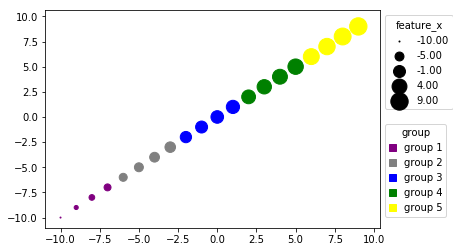

In [863]:
# colors for categorical variables  
colors=['purple', 'gray', 'blue', 'green', 'yellow', 'red', 'gray']

f, ax1 = plt.subplots(1,1);
gScatter(df=df, x='feature_x', y='feature_x', size='feature_x', color='feature_cat', ax=ax1)


In [860]:
df['sizes_gScatter']

0       1.000000
1      16.789474
2      32.578947
3      48.368421
4      64.157895
5      79.947368
6      95.736842
7     111.526316
8     127.315789
9     143.105263
10    158.894737
11    174.684211
12    190.473684
13    206.263158
14    222.052632
15    237.842105
16    253.631579
17    269.421053
18    285.210526
19    301.000000
Name: sizes_gScatter, dtype: float64

In [801]:
def gJack(data, x, y, ax):
    ax.scatter(data[x], data[y])

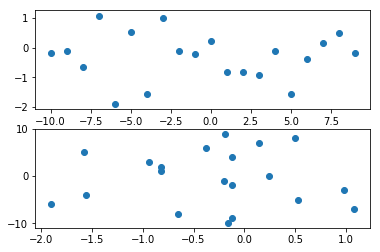

In [803]:
f, (ax1, ax2) = plt.subplots(2,1)
gJack(df, 'feature_x', 'feature_y', ax1)
gJack(data=df, x='feature_y', y='feature_x', ax=ax2)

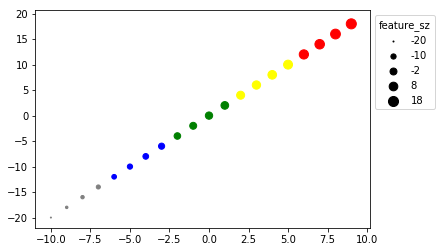

In [366]:
# Show markers accurately representing the continuously varying values of the feature, but
# only show a few size representations on the legend?

f, ax = plt.subplots(1,1);

# -- make a sizes vector and add it to the dataframe ---
szMaxMarker = 100
df['sizes'] = 1+szMaxMarker*((df['feature_sz']-df['feature_sz'].min())/(df['feature_sz'].max()-df['feature_sz'].min()))

# --- all for the legend - just pick number of points ---
noLegendPoints = 5
# these are the legend points, distributed through the size range
legendPoints_ideal = np.linspace(df['feature_sz'].min(), df['feature_sz'].max(), noLegendPoints)
# these are the dataframe rows that are closest to those legendPoints
# dense  list comprehension to get the closest values in the dataset that are distributed
legendPoints_data = [(df['feature_sz'].iloc[(df['feature_sz']-x).abs().argsort()[0]]) for x in legendPoints_ideal]
# find the rows and make a new dataframe; underlay the plot and add that
dfTemp = df[df['feature_sz'].isin(legendPoints_data)]
for i, data in dfTemp.iterrows():
    ax.scatter(data['feature_x'], data['feature_sz'], s=(data['sizes']), c='w', label=str(data['feature_sz']))




# --- actual data; make label=None so that it doesn't over-ride the custom plot for the legend ---
# ax.scatter(df['feature_x'], df['feature_y'], s=df['sizes'], color='k', label=None) #, color='k', 

# sizing and categorical variables
colors=['gray', 'blue', 'green', 'yellow', 'red']

for ind,data in enumerate(df['feature_cat'].unique()):
    dfTemp = df[df['feature_cat']==data]
    h = ax.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], s=dfTemp['sizes'], color=colors[ind], label=None) #label=dfTemp['feature_cat'])

# --- place the legend which should only show for the underlaying plot ---
ax.legend(title='feature_sz', loc='upper left', bbox_to_anchor=(1,1))
# manually set the colors of the marker legends to black
leg = ax.get_legend()
for i in range(len(leg.legendHandles)):
    leg.legendHandles[i].set_color('black')



### Summary of 2.2

Pro:
- Sizes are representative of the feature.

Con:
- A plot is being drawn again

## 2. Pandas dataframe syntax

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html

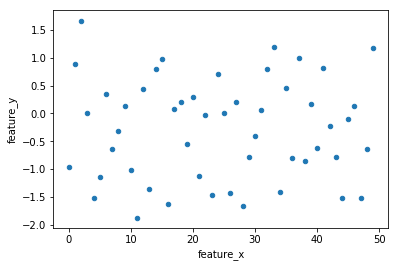

In [3]:
# 2.1 Basic scatter plot

df.plot.scatter('feature_x', 'feature_y')

# note commonalities in default colors

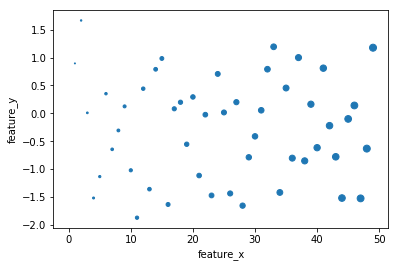

In [5]:
# 2.2 Scatter plot + size coding

df.plot.scatter('feature_x', 'feature_y', s=df['feature_sz'])

# requires that the size 

AttributeError: 'AxesSubplot' object has no attribute 'autoscale_None'

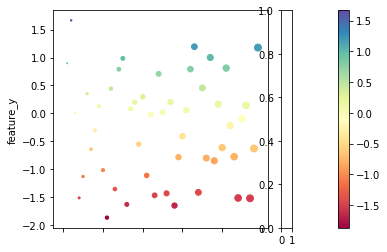

In [22]:
# 2.3 Scatter plot + size coding + color coding

my_cmap = 'Spectral'
ax = df.plot.scatter('feature_x', 'feature_y', s=df['feature_sz'], c=df['feature_c'], cmap=my_cmap)
plt.colorbar(ax)

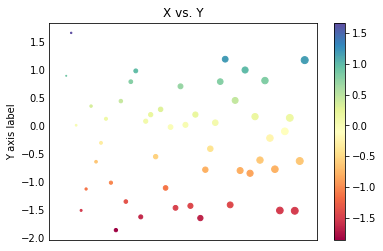

In [9]:
# 2.4 Scatter plot + size coding + color coding + aesthetic customization

# assign the dataframe to an axes
# (here, axes refers to the whole plot, not the x- and y-dimension)

my_cmap = 'Spectral'  # if a change in the default color map is desired, change this before plotting
ax = df.plot.scatter('feature_x', 'feature_y', s=df['feature_sz'], c=df['feature_c'], cmap=my_cmap)

# set equal to ax to alter axes

# make labels
ax.set_ylabel('Y axis label')
ax.set_xlabel('X axis label')
ax.set_title('X vs. Y')
ax.tick_params(axis='both', which='both',length=0)   # remove tick marks

# don't know why the x-axis goes away


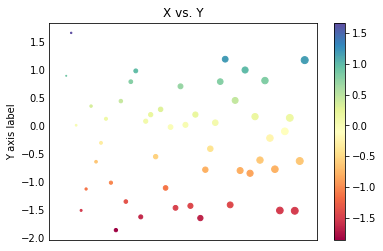

In [11]:
# 2.5 Scatter plot + size coding + color coding + aesthetic customization + regression line

# assign the dataframe to an axes
# (here, axes refers to the whole plot, not the x- and y-dimension)

my_cmap = 'Spectral'  # if a change in the default color map is desired, change this before plotting
ax = df.plot.scatter('feature_x', 'feature_y', s=df['feature_sz'], c=df['feature_c'], cmap=my_cmap)

# make labels
ax.set_ylabel('Y axis label')
ax.set_xlabel('X axis label')
ax.set_title('X vs. Y')
ax.tick_params(axis='both', which='both',length=0)   # remove tick marks

# don't know why the x-axis goes away

# drawing a regression line
# make an equation

# And now connect them
# ax.plot([x_0, x_1], [y_0, y_1], c='r')
# df.plot.line(x=0, y=1, ax=ax, style='b')

## 3. Matplotlib syntax

https://matplotlib.org/api/pyplot_api.html

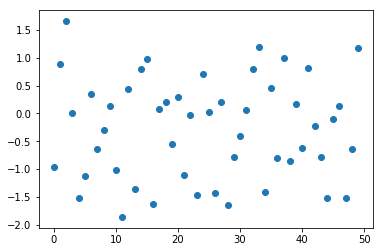

In [19]:
# 3.1.1 Basic scatter plot using matplotlib syntax
fig, ax = plt.subplots(1,1)
ax.scatter(x=df['feature_x'], y=df['feature_y'])
#ax2.scatter(x=df['feature_x'], y=df['feature_y'])

# note how the df has to be specified

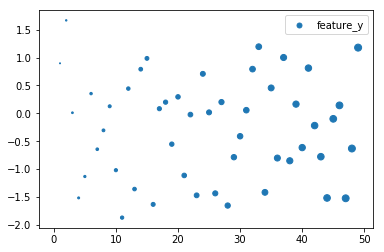

In [42]:
# 3.1.2 Scatter plot using matplotlib syntax + size coding
fig, ax = plt.subplots(1,1)
ax.scatter(x=df['feature_x'], y=df['feature_y'], s=df['feature_sz'])
ax.legend()



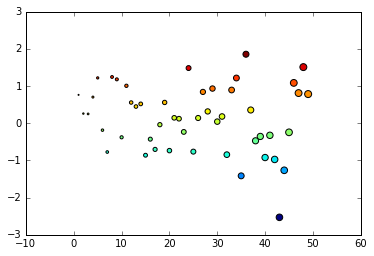

In [49]:
# 3.1.3.1 Scatter plot using matplotlib syntax + size coding + color coding (regression)

plt.scatter(x=df['feature_x'], y=df['feature_y'], s=df['feature_z'], c=df['feature_c'], cmap=None)

# note the default cmap. If None, defaults to rc image.cmap.

In [50]:
df['feature_cat'].unique()

array(['group 1', 'group 2', 'group 3', 'group 4', 'group 5'], dtype=object)

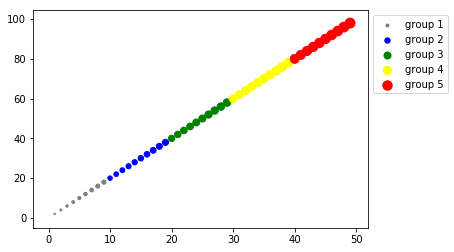

In [121]:
colors=['gray', 'blue', 'green', 'yellow', 'red']

fig, ax = plt.subplots(1)

for ind,data in enumerate(df['feature_cat'].unique()):
    dfTemp = df[df['feature_cat']==data]
    ax.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], s=dfTemp['feature_sz'], color=colors[ind], label=data)
                #  color=colors[ind])
        
      #  s=dfTemp['feature_sz'], 
ax.legend(scatterpoints=1, loc='upper left', bbox_to_anchor=(1,1))

#https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend/17412294

In [22]:
for ind,data in enumerate(df['feature_cat'].unique()):
    print(data)

group 1
group 2
group 3
group 4
group 5


NameError: name 'new_labels' is not defined

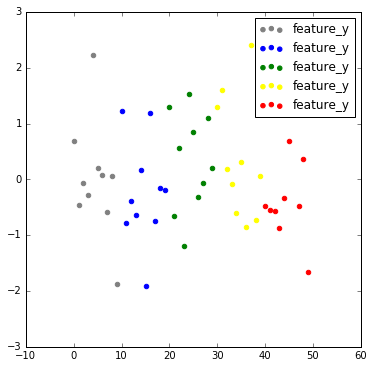

In [3]:
fig, ax = plt.subplots(1, figsize=(6, 6))

colors=['gray', 'blue', 'green', 'yellow', 'red']

# use an existing color map and apply towards categorical variables
cmap = sns.color_palette("GnBu", 5)

for ind,data in enumerate(df['feature_cat'].unique()):
    dfTemp = df[df['feature_cat']==data]
    ax.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], color=colors[ind])
                #s=dfTemp['feature_z'], color=colors[ind])
ax.legend()
ax.legend(scatterpoints=1, labels=new_labels, title='dropout %', loc='lower left')



In [ ]:
colorList =['gray', 'blue', 'green', 'yellow', 'red']

for ind,data in enumerate(df['feature_cat'].unique()):
    colorGrouping
    
    

In [ ]:
#https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}
ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))


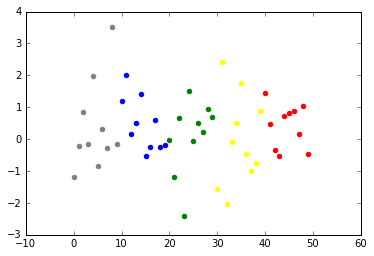

In [17]:
dfTemp = df[df['feature_cat']=='group 1']
plt.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], color=colors[0])

dfTemp = df[df['feature_cat']=='group 2']
plt.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], color=colors[1])

dfTemp = df[df['feature_cat']=='group 3']
plt.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], color=colors[2])

dfTemp = df[df['feature_cat']=='group 4']
plt.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], color=colors[3])

dfTemp = df[df['feature_cat']=='group 5']
plt.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'], color=colors[4])

# plt.legend()

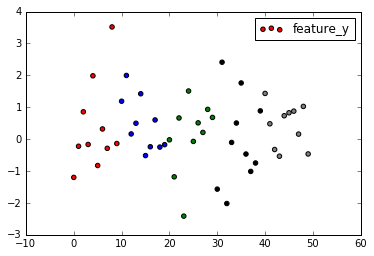

In [11]:
fig, ax = plt.subplots(1)
colors = {'group 1':'red', 'group 2':'blue', 'group 3':'green', 'group 4':'black', 'group 5':'gray'}
ax.scatter(df['feature_x'], df['feature_y'], c=df['feature_cat'].apply(lambda x: colors[x]))
ax.legend()

In [ ]:
# 3.1.3.2 Scatter plot using matplotlib syntax + size coding + color coding (context)



plt.scatter(x=df['feature_x'], y=df['feature_y'], s=df['feature_z'], c=df['feature_c'], cmap=None)

# note the default cmap. If None, defaults to rc image.cmap.


In [ ]:
# 3.1.4 Scatter plot using matplotlib syntax + size coding + color coding + aesthetic customization

my_cmap = 'Spectral' # if a change in the default color map is desired, change this before plotting
plt.scatter(x=df['feature_x'], y=df['feature_y'], s=df['feature_z'], c=df['feature_c'], cmap=my_cmap)
plt.colorbar()

# Make labels. These commands work on the current axes.
plt.ylabel('Y axis label')
plt.xlabel('X axis label')
plt.title('X vs. Y')


In [71]:
# 3.1.5 Scatter plot using matplotlib syntax + size coding + color coding + aesthetic customization + regression line



## 3.2 Matplotlib Axes syntax

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html

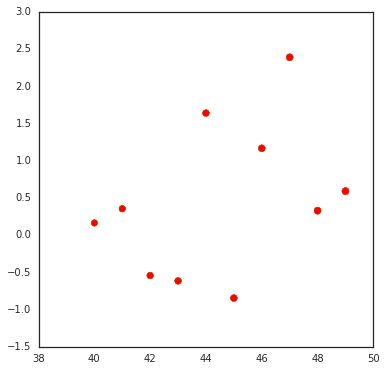

In [222]:
fig, ax = plt.subplots(1, figsize=(6, 6))

colors=['gray', 'blue', 'green', 'yellow', 'red']
for ind,data in enumerate(df['feature_cat'].unique()):
    dfTemp = df[df['feature_cat']==i]
    ax.scatter(x=dfTemp['feature_x'], y=dfTemp['feature_y'],
                s=dfTemp['feature_z'], color=colors[ind])

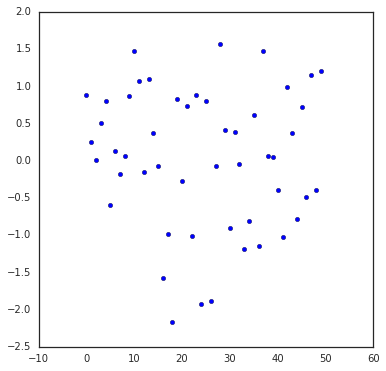

In [109]:
# 3.2.1 Basic scatter plot
# the initialization of a figure is necessary

fig, ax = plt.subplots(1, figsize=(6, 6))
ax.scatter(x=df['feature_x'], y=df['feature_y'])


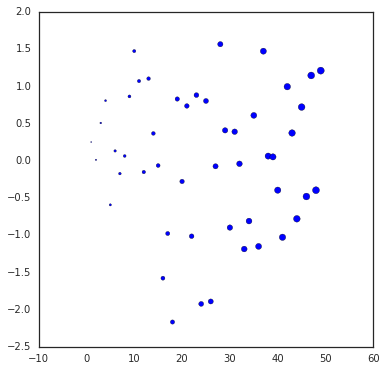

In [105]:
# 3.2.2 Basic scatter plot + size coding

fig, ax = plt.subplots(1, figsize=(6, 6))
ax.scatter(x=df['feature_x'], y=df['feature_y'], s=df['feature_z'])


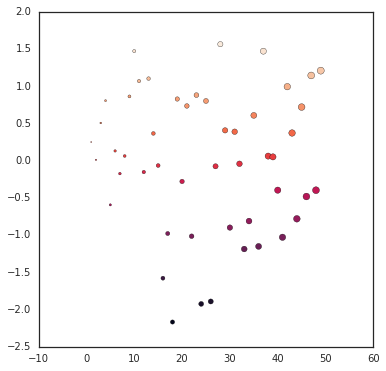

In [106]:
# 3.2.3 Basic scatter plot + size coding + color coding

fig, ax = plt.subplots(1, figsize=(6, 6))
ax.scatter(x=df['feature_x'], y=df['feature_y'], s=df['feature_z'], c=df['feature_c'])

# note default color scheme is like in 3.1.3

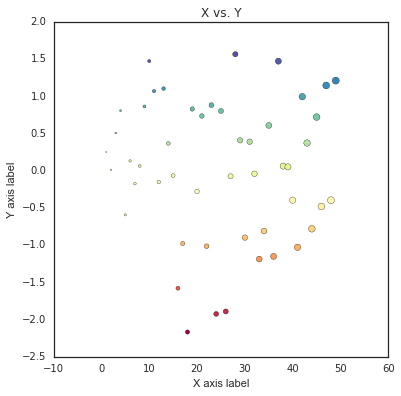

In [107]:
# 3.2.4 Basic scatter plot + size coding + color coding + aesthetic customization

fig, ax = plt.subplots(1, figsize=(6, 6))
my_cmap = 'Spectral' # if a change in the default color map is desired, change this before plotting

ax.scatter(x=df['feature_x'], y=df['feature_y'], s=df['feature_z'], c=df['feature_c'], cmap=my_cmap)

# make labels
ax.set_ylabel('Y axis label')
ax.set_xlabel('X axis label')
ax.set_title('X vs. Y')


In [ ]:
# 3.2.5 Scatter plot using matplotlib syntax + size coding + color coding + aesthetic customization + regression line




## 4. Seaborn syntax





### 4.1 Seaborn regplot

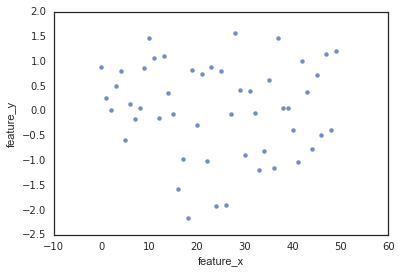

In [116]:
# 4.1.1 Basic scatter plot using seaborn regplot syntax

sns.regplot('feature_x', 'feature_y', data=df, fit_reg=False)

# This requires some more explicit syntax. You need to specify the dataframe and also turn off the regression fit which happens by default.

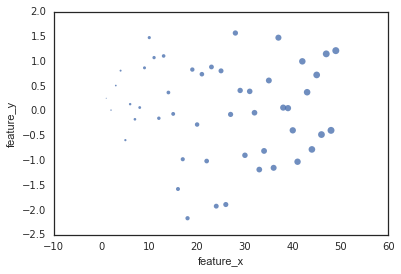

In [152]:
# 4.1.2 Scatter plot using seaborn regplot syntax + size coding

sns.regplot(data=df, 'feature_x', 'feature_y', scatter_kws={'s':df['feature_z']}, fit_reg=False)

# note how the scatter_kws parameter allows you to copy the matplotlib syntax,
# except using dictionary key-value pair syntax instead of setting the parameter equal to the value

In [155]:
?sns.regplot()

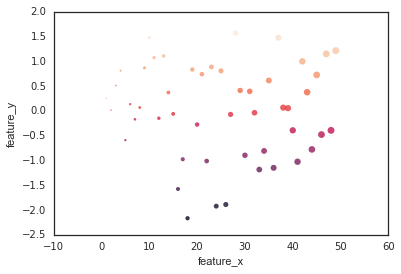

In [153]:
# 4.1.3 Basic scatter plot using seaborn syntax + with size coding + color coding

sns.regplot('feature_x', 'feature_y', data=df,
            scatter_kws={'s':df['feature_z'], 'c':df['feature_c']},
            fit_reg=False)

# add to the scatter_kws parameters

AttributeError: 'AxesSubplot' object has no attribute 'autoscale_None'

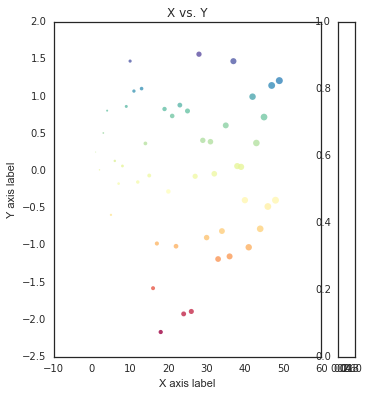

In [169]:
# 4.1.4 Basic scatter plot using seaborn regplot syntax +  size coding + color coding + aesthetic customization

fig, ax = plt.subplots(1, figsize=(6, 6))
my_cmap = 'Spectral' # if a change in the default color map is desired, change this before plotting

ax = sns.regplot('feature_x', 'feature_y', data=df,
                 scatter_kws={'s':df['feature_z'], 'c':df['feature_c'], 'cmap':my_cmap},
                 fit_reg=False)  #,  ,      # no easy size coding

# make labels
ax.set_ylabel('Y axis label')
ax.set_xlabel('X axis label')
ax.set_title('X vs. Y')

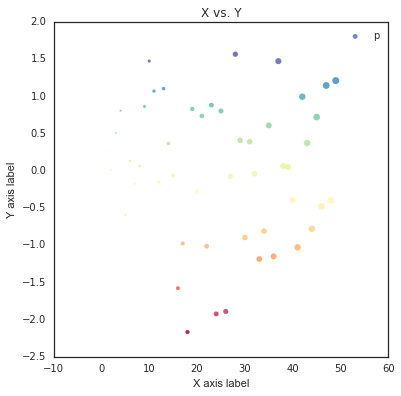

In [171]:
# 4.1.4 Basic scatter plot using seaborn regplot syntax +  size coding + color coding + aesthetic customization + legend

fig, ax = plt.subplots(1, figsize=(6, 6))
my_cmap = 'Spectral' # if a change in the default color map is desired, change this before plotting

ax = sns.regplot('feature_x', 'feature_y', data=df,
                 scatter_kws={'s':df['feature_z'], 'c':df['feature_c'], 'cmap':my_cmap,
                             'label':'test'},
                 fit_reg=False)  #,  ,      # no easy size coding

# make labels
ax.set_ylabel('Y axis label')
ax.set_xlabel('X axis label')
ax.set_title('X vs. Y')
ax.legend('points')

In [173]:
?sns.lmplot

### 4.2 Seaborn lmplot



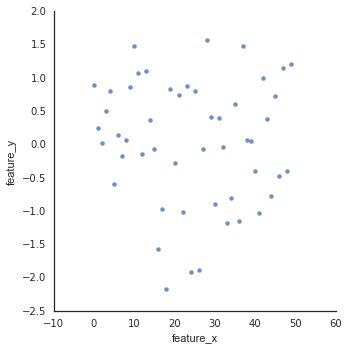

In [175]:
# 4.2.1 Basic scatter plot using seaborn lmplot syntax

sns.lmplot(x='feature_x', y='feature_y', data=df, fit_reg=False)

# like sns.regplot, the fit_reg is turned on by default so it's necessary to turn it off

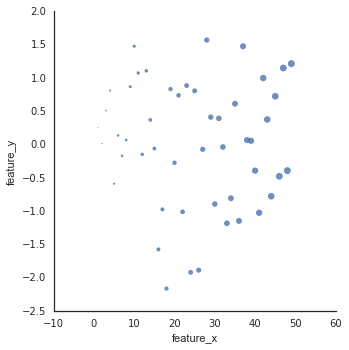

In [178]:
# 4.2.2 Scatter plot using seaborn lmplot syntax + size coding

sns.lmplot(x='feature_x', y='feature_y', data=df,
           scatter_kws={'s':df['feature_z']},
           fit_reg=False)

# Like regplot, pass size (and color) parameters in scatter_kws

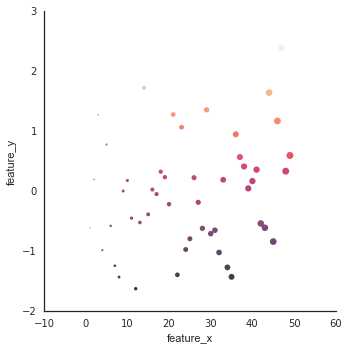

In [200]:
# 4.2.3.1 Scatter plot using seaborn lmplot syntax + size coding + color coding (regression)

sns.lmplot(x='feature_x', y='feature_y', data=df,
           scatter_kws={'s':df['feature_z'], 'c':df['feature_c']},
           fit_reg=False)

# like in sns.regplot, passing in parameters using scatter_kws is good for representing colors in a regression context

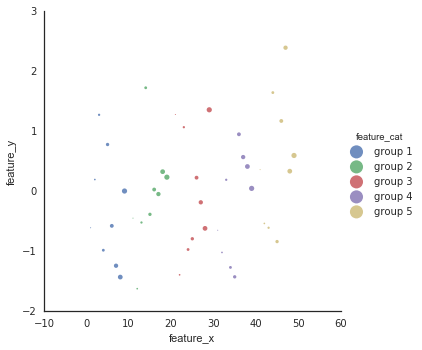

In [209]:
# 4.2.3.1 Basic scatter plot using seaborn regplot syntax + size coding + color coding (classification)

sns.lmplot(x='feature_x', y='feature_y', data=df,
           hue='feature_cat', scatter_kws={'s':df['feature_z']**1.5},
           fit_reg=False)

# Hue is good for coloring in a classification setting. a legend is created automatically.
# Use scatter_kws to control size, although if the default isn't represented
# well initially (as in my example), pass in a constant to multiply by

In [ ]:
# 4.2.4 Basic scatter plot using seaborn regplot syntax +  size coding + color coding + aesthetic customization + legend


fig, ax = plt.subplots(1, figsize=(6, 6))
my_cmap = 'Spectral' # if a change in the default color map is desired, change this before plotting

ax = sns.regplot('feature_x', 'feature_y', data=df,
                 scatter_kws={'s':df['feature_z'], 'c':df['feature_c'], 'cmap':my_cmap,
                             'label':'test'},
                 fit_reg=False)  #,  ,      # no easy size coding

# make labels
ax.set_ylabel('Y axis label')
ax.set_xlabel('X axis label')
ax.set_title('X vs. Y')
ax.legend('points')


In [ ]:
# 4.1.4 Basic scatter plot using seaborn regplot syntax +  size coding + color coding + aesthetic customization + legend



sns.lmplot(x='PCAx', y='PCAy', data=df_forPCA2,
                 hue='dropout category', ci=None, fit_reg=False,
                 size=4, palette=sns.color_palette("RdPu", 5))




In [172]:

#f, ax1 = plt.subplots(1, 1, figsize=(6,4));
ax1 = sns.lmplot(x='PCAx', y='PCAy', data=df_forPCA2,
                 hue='dropout category', ci=None, fit_reg=False,
                 size=4, palette=sns.color_palette("RdPu", 5))


#OrRd

# ax1.set(xlabel='', ylabel='', title='School demographic clusters (PCA), by dropout %')

# # replace figure labels
# new_labels = ['<1%', '1-2%', '2-5%', '5-10%', '>10%']
# for t, l in zip(ax1._legend.texts, new_labels): t.set_text(l)

# # figure properties
# sns.set(font='Franklin Gothic Book')
# sns.set_style(style='white')
# sns.despine(left=True, bottom=True, right=True)   #  remove frame
# plt.xticks((np.arange(-.8, 0.9, 0.8)))

# # to accomodate labeling
# plt.subplots_adjust(bottom=0.1, top=0.9, left=0.12, right=0.97)

# save figure
#plt.savefig('PCA_byDropoutPerc.png', dpi=400)

NameError: name 'df_forPCA2' is not defined

In [ ]:
# plt.figure()

# XaxisData = 'TOTAL_READ'
# YaxisData ='PCT_READS_MAPPED_TO_GENOME'
# ax = dfMetTP2.plot.scatter(x=XaxisData, y=YaxisData, color=F_purple)
# fontTitle = {'fontname' : 'Montserrat'}
# font1 = {'fontname':'Proxima Nova'}
# plt.title(XaxisData.replace('_', ' ') + ' vs. ' + YaxisData.replace('_', ' '), **fontTitle)
# plt.xlabel(XaxisData.replace('_', ' '), **font1)
# plt.ylabel(YaxisData.replace('_', ' '), **font1)

# fig = ax.get_figure()
# fig.savefig(XaxisData + '_vs_' + YaxisData + '.png')

# may need to edit for now
# Plotting scatter plot with colors
# plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
# colors = [F_purple, F_magenta, F_teal] # list( F_colors[i] for i in [0, 2, 4] ) # F_colors # pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

# fig, ax = plt.subplots()
# # ax.set_color_cycle(colors)
# ax.set_prop_cycle(c=colors)
# ax.margins(0.05)
# for name, group in IFCgroup:
#     ax.plot(group.TOTAL_READ, group.PCT_READS_MAPPED_TO_GENOME, marker='o', linestyle='', ms=6, label=name)
# ax.legend(numpoints=1, loc='lower right')

# XaxisData = 'TOTAL_READ'
# YaxisData ='PCT_READS_MAPPED_TO_GENOME'

# fontTitle = {'fontname' : 'Montserrat'}
# font1 = {'fontname':'Proxima Nova'}
# plt.title(XaxisData.replace('_', ' ') + ' vs. ' + YaxisData.replace('_', ' '), **fontTitle)
# plt.xlabel(XaxisData.replace('_', ' '), **font1)
# plt.ylabel(YaxisData.replace('_', ' '), **font1)

# plt.show()

In [ ]:
### making one figure with different subplots, each with different properties from each other

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(212)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,4))   #  sharey, sharex determines control of sharing axes properties

#####   properties for first figure   ##########
xorder = sorted(dfMetTP3['IFCtype, no'].unique().tolist())
sns.boxplot(x='IFCtype, no', y='PCT_READS_MAPPED_TO_GENOME', data=dfMetTP3,
                          order=xorder, color='#d3d3d3', ax=ax1)   # hex value for light gray
sns.swarmplot(x='IFCtype, no', y='PCT_READS_MAPPED_TO_GENOME', data=dfMetTP3,
                         order=xorder, alpha=1, color=F_violet, size=3, ax=ax1) #, palette=[F_teal, F_magenta, F_purple])

# plot the cutoff line
ax1.plot([0, 18], [0.90, 0.90], linewidth=1, linestyle='dashed', color='black', alpha=0.5)  # works with ax1
ax1.set_xticklabels(labels = xorder, rotation=90)   # works with ax1
ax1.set_ylim(0.87, 1)  # works with ax1

# plt.ylim(0.87, 1)   # matplotlib function, doesn't work with ax1

vals = ax1.axes.get_yticks()
ax1.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])   # works with ax1
ax1.set_ylabel('')  # works with ax1
#plt.ylabel('')  # matplotlib function, doesn't work with ax1
ax1.set_xlabel('')  # works with ax1
ax1.set_title('% Reads Mapped to Genome (NA12878)')  # works with ax1

# ax = plt.gca()  # this line not needed
xvals = ax1.axes.get_xticks()
ax1.text(len(xvals)/2-0.5, 0.892, 'spec', fontsize=10, color='black', ha='center', va='bottom')

sns.boxplot(x='IFCtype, no', y='TOTAL_READ', data=dfMetTP3,
                          order=xorder, color='#d3d3d3', ax=ax2)   # hex value for light gray
sns.swarmplot(x='IFCtype, no', y='TOTAL_READ', data=dfMetTP3,
                         order=xorder, alpha=1, color=F_violet, size=3, ax=ax2) #, palette=[F_teal, F_magenta, F_purple])

ax2.set_xticklabels(labels = xorder, rotation=90)   # works with ax2
# ax2.set_ylim(0.87, 1)  # works with ax1
ax2.set_title('Total Reads (NA12878)')  # works with ax2

# plt.subplots_adjust(bottom=0.2, top=0.91, left=0.12, right=0.97)
sns.set(font='Proxima Nova')
sns.set_style(style='white')



## 5. Scatter plot using ggplot syntax

### Making simulated histograms

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

% matplotlib inline

In [3]:
# colors--------------
F_purple = '#530080'
F_violet = '#9D0081'
F_magenta = '#E60082'
F_orange = '#FFAA00'
F_red = '#D90000'
F_lime = '#97E600'
F_green = '#005900'
F_teal = '#00BFBF'
F_blue = '#002680'

F_colors = [F_purple, F_violet, F_magenta, F_orange, F_red, F_lime, F_green, F_teal, 'gray', 'black', F_blue]

In [2]:
# set the right directory
import os
path = 'C:\\Users\\Benjamin.Lacar\\Desktop'
os.chdir(path) 
cwd = os.getcwd()
print(cwd)

C:\Users\Benjamin.Lacar\Desktop


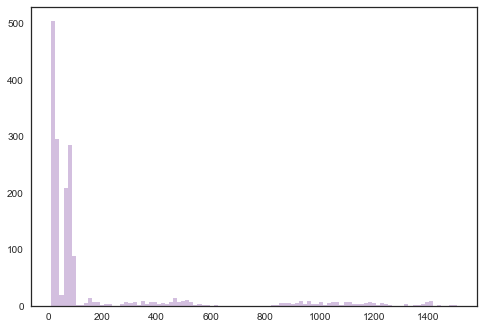

In [18]:
# generate a set of numbers that can replicate a hypothetical bioanalyzer data

#k1 = np.random.normal(loc=35.0, scale=5, size=35)   # marker 1
k2 = np.random.normal(loc=25.0, scale=5, size=800)   # primers
k3 = np.random.normal(loc=75.0, scale=10, size=300)    # primer dimers
k4 = np.random.normal(loc=150.0, scale=30, size=40)    # desired peak 1
k5 = np.random.normal(loc=300.0, scale=40, size=30)    # desired peak 2
k6 = np.random.normal(loc=400.0, scale=40, size=40)    # genomic
k7 = np.random.normal(loc=500.0, scale=40, size=50)    # genomic
k8 = np.random.normal(loc=600.0, scale=40, size=40)    # genomic
k8 = np.random.normal(loc=700.0, scale=40, size=40)    # genomic
k8 = np.random.normal(loc=800.0, scale=40, size=40)    # genomic
k8 = np.random.normal(loc=900.0, scale=40, size=40)    # genomic
k9 = np.random.normal(loc=1000, scale=40, size=30)   
k10 = np.random.normal(loc=1100, scale=40, size=30)   
k11 = np.random.normal(loc=1200, scale=40, size=30)   
k12 = np.random.normal(loc=1400, scale=40, size=30)   
kC = np.concatenate([k2, k3, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12])
# plot as a histogram
# x = np.random.normal(size=100)
ax = sns.distplot(kC, hist=True, kde=False, bins=100, hist_kws={"alpha": 0.25, "color":F_purple});
sns.set(font='Proxima Nova')
sns.set_style(style='white')

#ax.set_xlabel('No. of bases')
#plt.savefig('updatedPrimerDimer_bioA.png', dpi=400)

In [67]:
y=np.linspace(0,100,100)

In [68]:
y

array([   0.        ,    1.01010101,    2.02020202,    3.03030303,
          4.04040404,    5.05050505,    6.06060606,    7.07070707,
          8.08080808,    9.09090909,   10.1010101 ,   11.11111111,
         12.12121212,   13.13131313,   14.14141414,   15.15151515,
         16.16161616,   17.17171717,   18.18181818,   19.19191919,
         20.2020202 ,   21.21212121,   22.22222222,   23.23232323,
         24.24242424,   25.25252525,   26.26262626,   27.27272727,
         28.28282828,   29.29292929,   30.3030303 ,   31.31313131,
         32.32323232,   33.33333333,   34.34343434,   35.35353535,
         36.36363636,   37.37373737,   38.38383838,   39.39393939,
         40.4040404 ,   41.41414141,   42.42424242,   43.43434343,
         44.44444444,   45.45454545,   46.46464646,   47.47474747,
         48.48484848,   49.49494949,   50.50505051,   51.51515152,
         52.52525253,   53.53535354,   54.54545455,   55.55555556,
         56.56565657,   57.57575758,   58.58585859,   59.59595

In [69]:
x = np.random.uniform(40,1000,100)


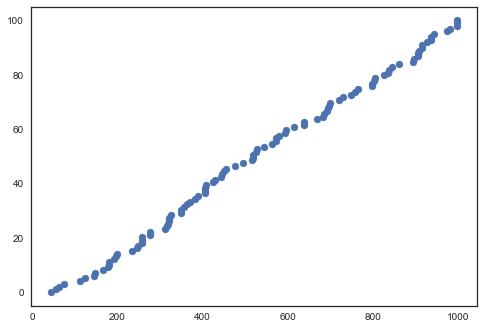

In [70]:
plt.scatter(np.sort(x), (y))

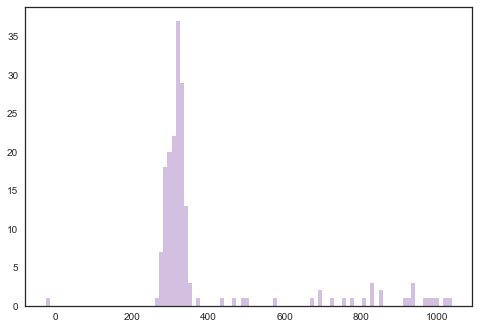

In [12]:
# generate a set of numbers that can replicate a hypothetical bioanalyzer data

#k1 = np.random.normal(loc=35.0, scale=5, size=35)   # marker 1
k2 = np.random.normal(loc=50.0, scale=10, size=0)   # primers
k3 = np.random.normal(loc=100.0, scale=10, size=0)    # primer dimers
k4 = np.random.normal(loc=300.0, scale=15, size=70)    # desired peak 1
k5 = np.random.normal(loc=325.0, scale=15, size=80)    # desired peak 2
k6 = np.random.normal(loc=600.0, scale=200, size=10)    # genomic
k7 = np.random.normal(loc=800.0, scale=200, size=10)    # genomic
k8 = np.random.normal(loc=1000.0, scale=100, size=10)    # genomic
#k9 = np.random.normal(loc=10380, scale=5, size=50)   # marker 2
kC = np.concatenate([k2, k3, k4, k5, k6, k7, k8])
# plot as a histogram
# x = np.random.normal(size=100)
ax = sns.distplot(kC, hist=True, kde=False, bins=100, hist_kws={"alpha": 0.25, "color":F_purple});
sns.set(font='Proxima Nova')
sns.set_style(style='white', )

#ax.set_xlabel('No. of bases')

# save figure
plt.savefig('Plot5_new.png', dpi=400)

In [ ]:
scipy.stats.skew(k2, )

# Plotting with Seaborn

### setting axis properties

see ax line down below
https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot


In [ ]:
ax = sns.factorplot(y='PCT_READS_MAPPED_TO_AMPLICONS_FROM_ALIGNED_READS', data=dfMetTP2, kind="box", palette=['gray'])
ax = sns.swarmplot(x=[""]*len(dfMetTP2), y='PCT_READS_MAPPED_TO_AMPLICONS_FROM_ALIGNED_READS', data=dfMetTP2, alpha=1, size=2,
              hue='IFC_no', palette=[F_teal, F_magenta, F_purple])

# plot our cutoff line
plt.plot([-.5, 0.5], [0.95, 0.95], linewidth=1, linestyle='dashed', color='black', alpha=0.5)

# for changing axes Seaborn's barplot returns an axis-object (not a figure). This means you can do the following: 
ax.set(title='% Reads Mapped to Target from Aligned Reads', ylabel='common y-label')  
plt.ylim(0.94, 1)   # matplotlib function


sns.set(font='Proxima Nova')
sns.set_style(style='white')

In [ ]:
# saving a figure
plt.savefig('pctReadsMappedToGenome_boxplot_byIFC_noScatter.png', dpi=400)

In [ ]:
# prevent saving from cutting off figure

figure.autolayout : True
    
    
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### quickly making visuals
https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# quick boxplot check
data.boxplot(column="ApplicantIncome",by="Loan_Status")

In [ ]:
# quick histogram check
dfMetTP2_b.hist(column='PCT_READS_MAPPED_TO_GENOME', by='IFC_no')

# Statistics

In [ ]:
import scipy.stats as stats

statsTest = stats.f_oneway
df = dfMetTP2.copy()
colMetric = 'PCT_READS_MAPPED_TO_GENOME'
grpCol = 'IFC_no'
dfForStats = df.pivot(columns=grpCol, values=colMetric)
 
stats.f_oneway(dfForStats.iloc[:,0].dropna(), dfForStats.iloc[:,1].dropna(), dfForStats.iloc[:,2].dropna())

### Python Coursera

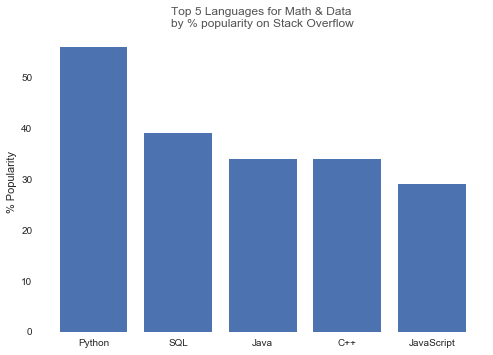

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#TODO: remove all the ticks (both axes), and tick labels on the Y axis
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='on', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()


Spine
Spine
Spine
Spine


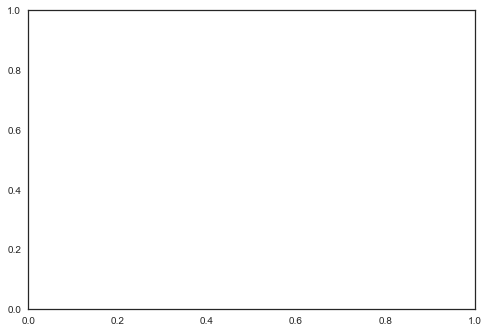

In [33]:
for spine in plt.gca().spines.values():
    print(spine)

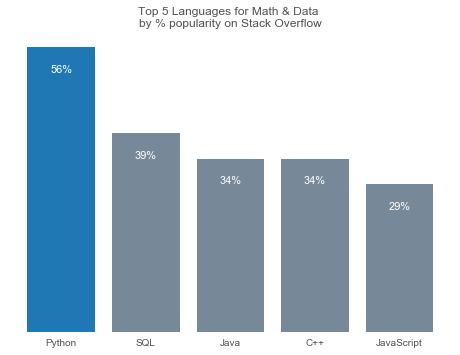

In [34]:
# dejunkified plot

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

In [39]:
### importing HTML table into pandas
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_San_Diego_Padres_seasons'
# but this can't find the table
data = pd.read_html(url, header=0)

# remove the footers too
df_winPerc = data[1].head(49)

In [44]:
# get the salary info

url = 'http://www.baseballprospectus.com/compensation/?cyear=2017&team=SDN&pos='
# but this can't find the table
data = pd.read_html(url, header=0)

df = data[1].iloc[36:,:]
df.columns = df.iloc[0]

In [65]:
df_Payroll = df.drop(36, axis=0).drop(['PR Sort', 'Diff', 'AvgPR Sort', 'Diff Sort'], axis=1).iloc[:, :3]

In [66]:
df_Payroll.head()

36,Year,Padres payroll,Avg payroll
37,1996,"$2,000,000","$4,583,416"
38,1997,"$2,000,000","$4,892,222"
39,2000,"$53,816,000","$57,548,235"
40,2001,"$37,438,000","$67,152,893"
41,2002,"$40,678,000","$69,249,884"


In [67]:
df_winPerc.head()

,Season,Level,League,Division,Finish,Wins,Losses,Win%,GB,Postseason,Awards
0,1969,MLB,NL,West,6th,52.0,110.0,0.321,41,NaN,NaN
1,1970,MLB,NL,West,6th,63.0,99.0,0.389,39,NaN,NaN
2,1971,MLB,NL,West,6th,61.0,100.0,0.379,28½,NaN,NaN
3,1972,MLB,NL,West,6th,58.0,95.0,0.379,36½,NaN,NaN
4,1973,MLB,NL,West,6th,60.0,102.0,0.370,39,NaN,NaN


In [69]:
df_all = pd.merge(df_winPerc, df_Payroll, how='inner', left_on='Season', right_on='Year')

In [70]:
df_all.head()

,Season,Level,League,Division,Finish,Wins,Losses,Win%,GB,Postseason,Awards,Year,Padres payroll,Avg payroll
0,1996,MLB,NL,West ^,1st,91.0,71.0,0.562,—,Lost NLDS (Cardinals) 3–0,Ken Caminiti (MVP) Bruce Bochy (MOY),1996,"$2,000,000","$4,583,416"
1,1997,MLB,NL,West,4th,76.0,86.0,0.469,14,NaN,NaN,1997,"$2,000,000","$4,892,222"
2,2000,MLB,NL,West,5th,76.0,86.0,0.469,21,NaN,NaN,2000,"$53,816,000","$57,548,235"
3,2001,MLB,NL,West,4th,79.0,83.0,0.488,13,NaN,NaN,2001,"$37,438,000","$67,152,893"
4,2002,MLB,NL,West,5th,66.0,96.0,0.407,32,NaN,NaN,2002,"$40,678,000","$69,249,884"


In [77]:

# convert currencies to float
df_all['Padres payroll'] = df_all['Padres payroll'].str.replace('$', '').str.replace(',','').astype(float)
df_all['Avg payroll'] = df_all['Avg payroll'].str.replace('$', '').str.replace(',','').astype(float)


In [78]:
df_all['Padres Payroll % of MLB average'] = df_all['Padres payroll']/df_all['Avg payroll']

In [86]:
# start at 2000s to since no data is available for 1998, 1999
df_all = df_all.iloc[2:,:]

In [89]:
df_all['Season'] = pd.to_datetime(df_all['Season'])

C:\Users\Benjamin.Lacar\AppData\Local\Continuum\Anaconda3_v440\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_all.set_index('Season', inplace=True)

In [97]:
df_all.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01'],
              dtype='datetime64[ns]', name='Season', freq=None)

In [207]:
df_all

,Level,League,Division,Finish,Wins,Losses,Win%,GB,Postseason,Awards,Year,Padres payroll,Avg payroll,Padres Payroll % of MLB average
Season,,,,,,,,,,,,,,
2000-01-01,MLB,NL,West,5th,76.0,86.0,0.469,21,NaN,NaN,2000,53816000.0,57548235.0,0.935146
2001-01-01,MLB,NL,West,4th,79.0,83.0,0.488,13,NaN,NaN,2001,37438000.0,67152893.0,0.557504
2002-01-01,MLB,NL,West,5th,66.0,96.0,0.407,32,NaN,NaN,2002,40678000.0,69249884.0,0.587409
2003-01-01,MLB,NL,West,5th,64.0,98.0,0.395,36½,NaN,NaN,2003,43565000.0,72210211.0,0.603308
2004-01-01,MLB,NL,West,3rd,87.0,75.0,0.537,6,NaN,NaN,2004,59172333.0,71437964.0,0.828304
2005-01-01,MLB,NL,West ^,1st,82.0,80.0,0.506,—,Lost NLDS (Cardinals) 3–0,NaN,2005,62186333.0,73700583.0,0.843770
2006-01-01,MLB,NL,West ^,1st,88.0,74.0,0.543,—,Lost NLDS (Cardinals) 3–1,NaN,2006,69170167.0,81320418.0,0.850588
2007-01-01,MLB,NL,West,3rd,89.0,74.0,0.546,1½,NaN,Jake Peavy (CYA),2007,58571067.0,85813074.0,0.682542
2008-01-01,MLB,NL,West,5th,63.0,99.0,0.389,21,NaN,NaN,2008,74010117.0,93345041.0,0.792866


In [208]:
import os
path = 'C:\\Users\\Benjamin.Lacar\\Documents\\Box\\Box Sync\\BL (Benjamin.Lacar@fluidigm.com)\\Python\\Coursera_dataScience\\course2_downloads\\week4'
os.chdir(path) 
cwd = os.getcwd()
print(cwd)

C:\Users\Benjamin.Lacar\Documents\Box\Box Sync\BL (Benjamin.Lacar@fluidigm.com)\Python\Coursera_dataScience\course2_downloads\week4


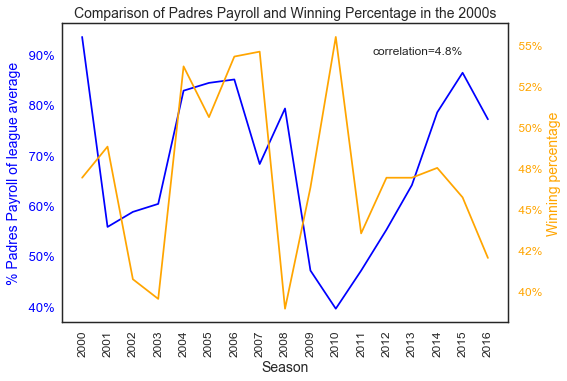

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('white')
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

fig, ax = plt.subplots()

ax.plot(df_all['Padres Payroll % of MLB average'], color='blue')
ax2 =ax.twinx()
ax2.plot(df_all['Win%'], color='orange')

# add correlation coefficient
cc = df_all[['Win%', 'Padres Payroll % of MLB average']].corr(method='pearson', min_periods=1).iloc[0,1];

ax.text(ax.get_xticks()[-1], ax.get_yticks()[-2], 'correlation='+str("%.1f" % (100*cc))+'%', ha='right');


# change left y-axis to percentage and make blue
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals], color='blue', size=13);
ax.set_ylabel('% Padres Payroll of league average', size=14)
ax.yaxis.label.set_color('blue')

# change right y-axis to percentage and make orange
vals = ax2.get_yticks();
ax2.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals], color='orange', size=12);
ax2.set_ylabel('Winning percentage', size=14)
ax2.yaxis.label.set_color('orange')

# edit title and xlabel
ax.set_xlabel('Season', size=14)
ax.set_title('Comparison of Padres Payroll and Winning Percentage in the 2000s', size=14)

# change years to show all and rotate
ax.set_xticks(df_all.index);
ax.set_xticklabels(df_all.index.year, size=12, rotation=90);


plt.savefig('pctPadresPayroll_pctWinning.png', dpi=400)

In [171]:
df_all[['Win%', 'Padres Payroll % of MLB average']].corr(method='pearson', min_periods=1).iloc[0,1]

0.048123323911428026

In [212]:
df_all.loc['Win%'].corr(df_all['Padres Payroll % of MLB average'])

0.048123323911428012

In [219]:
df_all.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01'],
              dtype='datetime64[ns]', name='Season', freq=None)

In [221]:
df_all.loc[:'2007-01-01','Win%'].corr(df_all.loc[:'2007-01-01','Padres Payroll % of MLB average'])

0.50195481219779436

In [ ]:
# trying with jsp

import pandas as pd
url = 'http://sandiego.padres.mlb.com/sd/history/year_by_year_results.jsp'
# but this can't find the table
pd.read_html(url)

# try beautiful soup and requests
from bs4 import BeautifulSoup
import re
import urllib.request
import requests

page = urllib.request.urlopen(url).read()
soup = BeautifulSoup(page)

In [8]:
pd.read_html(requests.get(url).text)

ValueError: No tables found